<a href="https://colab.research.google.com/github/harperd17/energy_volatility_prediction/blob/main/ElectricAccount_Ingestion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview

The goal of this notebook is to collect data from EIA of electricity accounts by state and sector to calculate:

$$ \text{kWh_percapita} = \frac{\text{kWh}}{\text{electric_accounts}}$$

Sectors include - Residential (RES), Commericial (COM), Transporation (TRA), Industrial (IND), and Other (OTH)

Still To Do:
* **Status - Complete**
* Check kWh per capita calculation for states AR, AK, and AZ.  It's odd that they all start with the letter A.
* Place plots into slide deck

Other notebooks to reference:
* [Electricity_Sales_EDA]("https://colab.research.google.com/drive/1LP_qEQlQGi64VO5tJs7_86WKwdNUIm8V#scrollTo=ifZsZJ-ECsKk")


# Look at EIA population - https://www.eia.gov/opendata/qb.php?category=40367&sdid=SEDS.TPOPP.AL.A

In [ ]:
import requests
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [ ]:
try:
    from google.colab import drive

    drive.mount('./drive/')

    %cd drive/My \ Drive/Data606_Energy

except:
    print("No Colab Environment")

Mounted at ./drive/
[Errno 2] No such file or directory: 'drive/My  Drive/Data606_Energy'
/content


In [ ]:
import sys
import pandas as pd
import glob
from tqdm.autonotebook import tqdm
sys.path.append("helpers/")

from energygrid import EGRID

from helper_functions import write_csv, combine_like_files
import json
import numpy as np

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  after removing the cwd from sys.path.


In [ ]:
energy_grid = EGRID()
energy_grid.get_states()

# Start Here - Place them in Res, Com, Tra, Ind folders

In [ ]:
with open ("creds/eia_creds.json") as f:
    creds = json.load(f)
    key = creds.get("key")

[Number of Electricity Accounts]("https://www.eia.gov/opendata/qb.php?category=1718389")


RES- http://api.eia.gov/series/?api_key=YOUR_API_KEY_HERE&series_id=ELEC.CUSTOMERS.AL-RES.A
COM- http://api.eia.gov/series/?api_key=YOUR_API_KEY_HERE&series_id=ELEC.CUSTOMERS.AL-COM.A
ind- http://api.eia.gov/series/?api_key=YOUR_API_KEY_HERE&series_id=ELEC.CUSTOMERS.AL-IND.A
TRA- http://api.eia.gov/series/?api_key=YOUR_API_KEY_HERE&series_id=ELEC.CUSTOMERS.AZ-TRA.A

**Residential DATA**-**CUSTOMERS**


In [ ]:
sectors = ["ALL","RES","COM","IND","TRA","OTH"]
electric_account_kickout = set()

for sector in tqdm(sectors):
    print(sector)
    for index, state in enumerate(tqdm(energy_grid.states)):
        try:
            response = requests.get(f"http://api.eia.gov/series/?api_key={key}&series_id=ELEC.CUSTOMERS.{state}-{sector}.M").json()

            data_series = response.get("series")[0]

            df = pd.DataFrame(data_series)

            fn_json = f"data/percapita/electric_accounts/json/{sector}/{state}_electric_accounts.json"

            df["sector"] = sector

            df.to_json(fn_json)
        except TypeError:
            electric_account_kickout.add((sector,state))

  0%|          | 0/6 [00:00<?, ?it/s]

ALL


  0%|          | 0/51 [00:00<?, ?it/s]

RES


  0%|          | 0/51 [00:00<?, ?it/s]

COM


  0%|          | 0/51 [00:00<?, ?it/s]

IND


  0%|          | 0/51 [00:00<?, ?it/s]

TRA


  0%|          | 0/51 [00:00<?, ?it/s]

OTH


  0%|          | 0/51 [00:00<?, ?it/s]

In [ ]:
#index and plants combinations not found
write_csv("data/percapita/electric_accounts/kickouts.csv",["sector","state"],electric_account_kickout)

File written to data/percapita/electric_accounts/kickouts.csv


In [ ]:
pd.read_csv("data/percapita/electric_accounts/kickouts.csv").groupby(["sector","state"]).count()

Empty DataFrame
Columns: []
Index: [(OTH, AK), (OTH, AL), (OTH, AR), (OTH, AZ), (OTH, CA), (OTH, CO), (OTH, CT), (OTH, DC), (OTH, DE), (OTH, FL), (OTH, GA), (OTH, HI), (OTH, IA), (OTH, ID), (OTH, IL), (OTH, IN), (OTH, KS), (OTH, KY), (OTH, LA), (OTH, MA), (OTH, MD), (OTH, ME), (OTH, MI), (OTH, MN), (OTH, MO), (OTH, MS), (OTH, MT), (OTH, NC), (OTH, ND), (OTH, NE), (OTH, NH), (OTH, NJ), (OTH, NM), (OTH, NV), (OTH, NY), (OTH, OH), (OTH, OK), (OTH, OR), (OTH, PA), (OTH, RI), (OTH, SC), (OTH, SD), (OTH, TN), (OTH, TX), (OTH, UT), (OTH, VA), (OTH, VT), (OTH, WA), (OTH, WI), (OTH, WV), (OTH, WY), (TRA, AK), (TRA, AL), (TRA, DE), (TRA, HI), (TRA, IA), (TRA, ID), (TRA, KS), (TRA, KY), (TRA, ME), (TRA, MS), (TRA, MT), (TRA, ND), (TRA, NE), (TRA, NH), (TRA, NM), (TRA, OK), (TRA, SC), (TRA, SD), (TRA, VT), (TRA, WY)]

[71 rows x 0 columns]

In [ ]:
df = combine_like_files("data/percapita/electric_accounts/json/*/*",pd.read_json)

In [ ]:
df.sample(10)

,series_id,name,units,f,description,copyright,source,iso3166,geography,start,end,updated,data,sector
13531,ELEC.CUSTOMERS.NM-COM.M,Number of customer accounts : New Mexico : com...,number of customers,M,Electricity sold to commercial customers; Elec...,None,"EIA, U.S. Energy Information Administration",USA-NM,USA-NM,200801,202107,2021-09-23T14:54:35-0400,"[202105, 144630]",COM
28614,ELEC.CUSTOMERS.PA-TRA.M,Number of customer accounts : Pennsylvania : t...,number of customers,M,Electricity sold to transportation customers; ...,None,"EIA, U.S. Energy Information Administration",USA-PA,USA-PA,200801,202107,2021-09-23T14:54:35-0400,"[201402, 5]",TRA
11783,ELEC.CUSTOMERS.MI-COM.M,Number of customer accounts : Michigan : comme...,number of customers,M,Electricity sold to commercial customers; Elec...,None,"EIA, U.S. Energy Information Administration",USA-MI,USA-MI,200801,202107,2021-09-23T14:54:35-0400,"[201708, 543406]",COM
6624,ELEC.CUSTOMERS.TN-RES.M,Number of customer accounts : Tennessee : resi...,number of customers,M,Electricity sold to residential customers; Ele...,None,"EIA, U.S. Energy Information Administration",USA-TN,USA-TN,200801,202107,2021-09-23T14:54:35-0400,"[201211, 2722885]",RES
27396,ELEC.CUSTOMERS.MO-TRA.M,Number of customer accounts : Missouri : trans...,number of customers,M,Electricity sold to transportation customers; ...,None,"EIA, U.S. Energy Information Administration",USA-MO,USA-MO,200801,202107,2021-09-23T14:54:35-0400,"[202007, 2]",TRA
12696,ELEC.CUSTOMERS.MS-COM.M,Number of customer accounts : Mississippi : co...,number of customers,M,Electricity sold to commercial customers; Elec...,None,"EIA, U.S. Energy Information Administration",USA-MS,USA-MS,200801,202107,2021-09-23T14:54:35-0400,"[200906, 224178]",COM
5564,ELEC.CUSTOMERS.ND-RES.M,Number of customer accounts : North Dakota : r...,number of customers,M,Electricity sold to residential customers; Ele...,None,"EIA, U.S. Energy Information Administration",USA-ND,USA-ND,200801,202107,2021-09-23T14:54:35-0400,"[201909, 386279]",RES
28989,ELEC.CUSTOMERS.TX-TRA.M,Number of customer accounts : Texas : transpor...,number of customers,M,Electricity sold to transportation customers; ...,None,"EIA, U.S. Energy Information Administration",USA-TX,USA-TX,200801,202107,2021-09-23T14:54:35-0400,"[201001, 3]",TRA
28643,ELEC.CUSTOMERS.PA-TRA.M,Number of customer accounts : Pennsylvania : t...,number of customers,M,Electricity sold to transportation customers; ...,None,"EIA, U.S. Energy Information Administration",USA-PA,USA-PA,200801,202107,2021-09-23T14:54:35-0400,"[201109, 15]",TRA
34473,ELEC.CUSTOMERS.MT-ALL.M,Number of customer accounts : Montana : all se...,number of customers,M,All end-use sectors that consume electricity; ...,None,"EIA, U.S. Energy Information Administration",USA-MT,USA-MT,200801,202107,2021-09-23T14:54:35-0400,"[201411, 599979]",ALL


# Validation
* To check whether each state has the same amount of records per sector

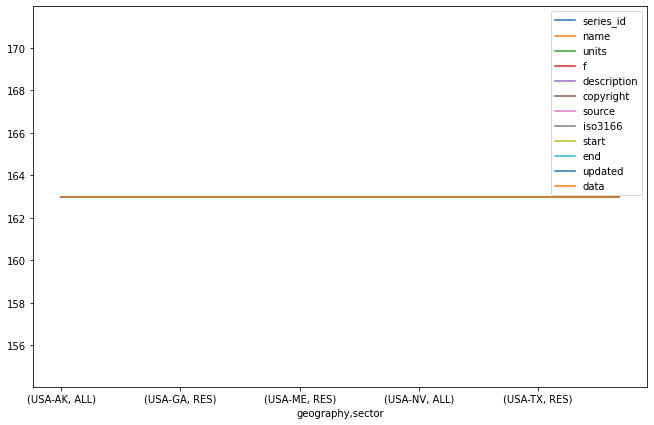

In [ ]:
_ = df.groupby(["geography","sector"]).count().plot(figsize=(11,7))